#### Audio Classification Data Preprocessing

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
### Let's read a sample audio using librosa
import IPython.display as ipd
import librosa
audio_file_path='/content/drive/MyDrive/Aegis - DL/Portfolio Project/Audio/fold3/103199-4-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[-0.00212592 -0.00114879  0.00332133 ... -0.00449107  0.00265597
  0.00692732]


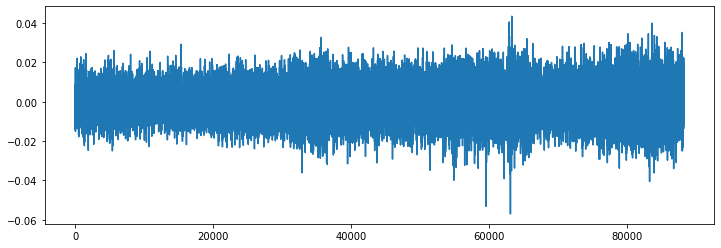

In [60]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
ipd.Audio(audio_file_path)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [15]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [ ]:
wave_audio

array([[-152,  -64],
       [-214,   79],
       [-280,  231],
       ...,
       [ 445, -127],
       [ 462,  -40],
       [ 471,   56]], dtype=int16)

In [56]:
wave_sample_rate

44100

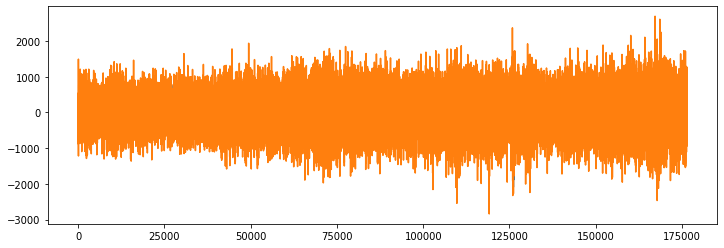

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features : Mel-frequency cepstral coefficients
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

meanfreq: mean frequency (in kHz)
sd: standard deviation of frequency
median: median frequency (in kHz)
Q25: first quantile (in kHz)
Q75: third quantile (in kHz)
IQR: interquantile range (in kHz)
skew: skewness (see note in specprop description)
kurt: kurtosis (see note in specprop description)
sp.ent: spectral entropy
sfm: spectral flatness
mode: mode frequency
centroid: frequency centroid (see specprop)
peakf: peak frequency (frequency with highest energy)
meanfun: average of fundamental frequency measured across acoustic signal
minfun: minimum fundamental frequency measured across acoustic signal
maxfun: maximum fundamental frequency measured across acoustic signal
meandom: average of dominant frequency measured across acoustic signal
mindom: minimum of dominant frequency measured across acoustic signal
maxdom: maximum of dominant frequency measured across acoustic signal
dfrange: range of dominant frequency measured across acoustic signal
modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

In [17]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [18]:
mfccs

array([[-3.2282800e+02, -3.1867728e+02, -3.1936292e+02, ...,
        -2.8196396e+02, -2.8573694e+02, -2.8733829e+02],
       [ 9.7387146e+01,  1.0323341e+02,  1.0692604e+02, ...,
         1.0149964e+02,  1.0002989e+02,  9.5665131e+01],
       [-4.9059578e+01, -5.1133385e+01, -5.0150566e+01, ...,
        -5.0226006e+01, -4.9749207e+01, -5.5144241e+01],
       ...,
       [ 5.9130845e+00,  5.9785528e+00,  4.6255455e+00, ...,
        -1.8637451e+00,  1.7106956e+00,  6.0913739e+00],
       [-1.6008866e+00, -3.1347950e+00, -4.7176757e+00, ...,
        -1.0884569e+01, -5.3912072e+00,  2.1859980e-01],
       [ 7.4461818e-02, -3.1113815e-01,  1.7597693e-01, ...,
        -2.5245697e+00,  5.4970407e-01,  3.8325777e+00]], dtype=float32)

In [61]:
pd.DataFrame(mfccs)

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
0,-322.828003,-318.677277,-319.362915,-315.710754,-319.002777,-319.952393,-325.864838,-324.377411,-325.337616,-327.182312,...,-270.352203,-270.458313,-272.344849,-276.500916,-275.344666,-275.282776,-275.763916,-281.963959,-285.736938,-287.338287
1,97.387146,103.233414,106.926041,112.155960,111.675781,108.330482,106.028122,101.481667,103.025131,105.503296,...,102.532684,97.611565,88.455574,91.556458,92.470695,91.050140,97.880447,101.499641,100.029892,95.665131
2,-49.059578,-51.133385,-50.150566,-46.967056,-42.374149,-42.063614,-44.479179,-47.637932,-47.730358,-51.479187,...,-53.433365,-49.479256,-48.517715,-49.785458,-48.425156,-49.466957,-49.356499,-50.226006,-49.749207,-55.144241
3,18.966875,17.864864,23.874310,24.058300,19.687366,17.633743,16.697502,18.339140,18.336842,14.285437,...,16.249836,15.091272,14.148763,13.106408,15.602665,21.504177,21.400259,17.102285,18.865700,20.607523
4,-2.779477,-8.995780,-11.070879,-11.356271,-16.064100,-18.621281,-21.779228,-18.617565,-9.991067,-11.617563,...,-17.077448,-16.458401,-16.396404,-16.282368,-9.569855,-7.356367,-8.754156,-14.472532,-17.119980,-13.097919
5,17.630121,20.111431,20.938482,19.711937,19.878080,24.920385,23.550133,20.093010,26.341684,27.515886,...,17.585419,17.099215,16.719250,17.952122,22.943916,22.041550,19.202953,20.948574,22.045313,14.419214
6,-9.736874,-7.830566,-14.393015,-14.013422,-11.107582,-8.570705,-8.391455,-8.463385,-7.523952,-8.174658,...,-14.152798,-13.811623,-15.386316,-15.371826,-14.815037,-15.268965,-9.844969,-9.619316,-10.738688,-12.614199
7,3.703289,2.080318,-4.893833,-4.769328,-1.942607,-0.560373,0.131072,1.303082,0.073342,-1.058913,...,0.956594,0.161300,1.255703,2.009347,-0.309604,-4.535596,0.169784,3.410087,2.194565,-0.263642
8,14.965498,19.297293,15.148788,14.444448,12.394876,10.571715,9.835395,10.934891,11.864414,14.125965,...,9.000935,9.201480,8.483055,1.731919,1.964383,8.194117,10.162066,11.012206,15.536589,17.186832
9,-4.914559,-0.938049,0.921364,1.321595,-1.062244,-6.178417,-3.991039,-0.480435,-5.384710,-5.447277,...,1.694860,2.010995,2.782168,1.747382,2.166158,-2.221350,-0.682152,-0.301934,1.669575,0.764184


In [19]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/Aegis - DL/Portfolio Project/Audio/'
metadata=pd.read_csv('/content/drive/MyDrive/Aegis - DL/Portfolio Project/Audio/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [20]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [21]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [43:48,  1.50it/s]/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8326it [1:42:10,  1.44it/s]/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8329it [1:42:12,  1.54it/s]/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [1:47:02,  1.36it/s]


In [22]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",dog_bark
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",children_playing
2,"[-458.52844, 121.35432, -46.535675, 51.969467,...",children_playing
3,"[-413.63254, 101.61351, -35.43868, 53.047146, ...",children_playing
4,"[-446.38693, 113.68634, -52.4572, 60.349724, 2...",children_playing


In [23]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [24]:
X.shape

(8732, 40)

In [25]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [26]:
### Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [28]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train

array([[-1.3082390e+02,  1.1256225e+02, -2.2600878e+01, ...,
         3.2528090e+00, -1.3692100e+00,  2.7386472e+00],
       [-1.3446434e+01,  9.1048195e+01, -7.8661475e+00, ...,
        -3.2665925e+00, -5.2884049e+00, -1.5532947e+00],
       [-4.9575279e+01,  2.3543632e-01, -2.0504959e+01, ...,
         2.8775635e+00, -1.5828822e+00,  3.5109408e+00],
       ...,
       [-4.2677444e+02,  9.2583252e+01,  3.3174915e+00, ...,
         7.9330575e-01,  7.1890563e-01,  7.1397936e-01],
       [-1.4541722e+02,  1.3619025e+02, -3.3450352e+01, ...,
         1.4591718e+00, -1.9928970e+00, -8.9318532e-01],
       [-4.2099823e+02,  2.1074756e+02,  3.5814040e+00, ...,
        -5.4054899e+00, -3.3959770e+00, -1.5590971e+00]], dtype=float32)

In [31]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
X_train.shape

(6985, 40)

In [33]:
X_test.shape

(1747, 40)

In [34]:
y_train.shape

(6985, 10)

In [35]:
y_test.shape

(1747, 10)

### Model Creation

In [36]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from sklearn import metrics

In [38]:
### No of classes
num_labels=y.shape[1]

In [39]:
model=Sequential()
###first layer
model.add(Dense(256,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [41]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
215/219 [============================>.] - ETA: 0s - loss: 11.1010 - accuracy: 0.1243
Epoch 1: val_loss improved from inf to 2.29259, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 6ms/step - loss: 10.9789 - accuracy: 0.1238 - val_loss: 2.2926 - val_accuracy: 0.1053
Epoch 2/100
206/219 [===========================>..] - ETA: 0s - loss: 2.6157 - accuracy: 0.1206
Epoch 2: val_loss improved from 2.29259 to 2.28170, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.6023 - accuracy: 0.1210 - val_loss: 2.2817 - val_accuracy: 0.1105
Epoch 3/100
215/219 [============================>.] - ETA: 0s - loss: 2.3501 - accuracy: 0.1260
Epoch 3: val_loss improved from 2.28170 to 2.27109, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3501 - accuracy: 0.1260 - val_loss: 2.2711 - val_accuracy: 0.11

In [43]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7515740990638733


In [46]:
X_test[1]

array([-465.89066  ,    1.1322277,  -34.01122  ,   35.365326 ,
        -14.865486 ,  -19.09527  ,   -0.5655366,  -16.102211 ,
        -21.32794  ,    7.7042246,  -29.161444 ,  -18.939268 ,
         -2.9505708,   -8.135997 ,  -15.148013 ,   -6.580668 ,
         -7.555405 ,    9.359482 ,   14.432987 ,   21.94775  ,
         20.870613 ,    1.3638182,  -19.213827 ,   -4.613979 ,
         -1.0521431,    3.2284064,   -6.983857 ,  -16.403254 ,
        -10.018602 ,   13.024475 ,    0.5268236,  -23.8531   ,
        -15.273722 ,    9.262865 ,   10.387703 ,   -0.562457 ,
         -1.2470247,   17.716091 ,   13.853949 ,   -5.1873612],
      dtype=float32)

In [48]:
model.predict(X_test)

55/55 [==============================] - 0s 2ms/step


array([[6.8090427e-05, 5.0846196e-04, 2.8217810e-05, ..., 2.7154066e-09,
        1.0343482e-06, 1.2857649e-02],
       [3.3402605e-06, 7.3751374e-03, 1.7250245e-02, ..., 1.5598705e-06,
        7.9040782e-04, 1.6969174e-02],
       [1.3876925e-06, 8.9181010e-03, 2.2586940e-04, ..., 1.2783505e-03,
        7.9458616e-05, 4.3488774e-03],
       ...,
       [2.2776597e-07, 8.3339244e-01, 4.4343078e-06, ..., 8.3188127e-07,
        2.0737486e-06, 1.6432254e-01],
       [3.1386918e-01, 1.0275639e-02, 2.3914392e-01, ..., 3.9662026e-02,
        2.3901168e-02, 1.8158844e-01],
       [2.1645990e-01, 1.4337120e-02, 2.0305876e-01, ..., 2.9400412e-03,
        2.5785400e-02, 1.8028295e-01]], dtype=float32)

In [55]:
filename="/content/drive/MyDrive/Aegis - DL/Portfolio Project/Audio/fold2/102104-3-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print("mfccs_features : ",mfccs_features )
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print("mfccs_scaled_features : ",mfccs_scaled_features)
print("mfccs_scaled_features shape : ",mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print("predicted_label : ",predicted_label)


mfccs_features :  [[-3.2133530e+02 -2.9824301e+02 -2.6880765e+02 ... -2.6903659e+02
  -2.8427414e+02 -3.0668686e+02]
 [ 9.9722939e+01  1.0079768e+02  8.5783997e+01 ...  1.0624925e+02
   9.9988121e+01  9.7747604e+01]
 [-4.7465088e+01 -5.2175488e+01 -5.7191177e+01 ... -5.0556305e+01
  -5.6249870e+01 -5.9773823e+01]
 ...
 [-3.8799558e+00  8.1415951e-02 -2.2831173e+00 ... -7.1732264e+00
  -2.3443706e+00 -5.3406274e-01]
 [ 4.7292967e+00  4.1280842e+00 -4.4321615e-01 ...  4.0888300e+00
  -1.2638506e+00 -3.0952992e+00]
 [ 2.5476537e+00  1.8827796e-01 -1.5495169e-01 ... -1.0037627e+00
  -9.4343424e-01 -3.8938975e+00]]
mfccs_scaled_features :  [[-2.60323792e+02  1.02183784e+02 -5.57364082e+01  1.14284410e+01
  -1.96666355e+01  4.06987667e+00 -1.14384718e+01  6.54926062e+00
  -4.73708302e-01  1.00241594e+01 -2.97951484e+00  1.26771832e+01
  -4.51678801e+00  5.58762598e+00 -9.08291626e+00  3.39643836e+00
  -7.42675781e+00  8.31909657e+00 -2.76415491e+00  8.55622101e+00
  -5.18393707e+00  5.879964

DataSet Link : https://urbansounddataset.weebly.com/download-urbansound8k.html